# Importing Libraries

In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import math

# Loading Image

In [2]:
img_path = './images/Bird2.jpg'
img_path

'./images/Bird2.jpg'

In [3]:
bgr_img = cv2.imread(img_path, -1)
rgb_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB)
gray_img = cv2.imread(img_path, 0)
rgb_img.shape
gray_img.shape

(1200, 1920)

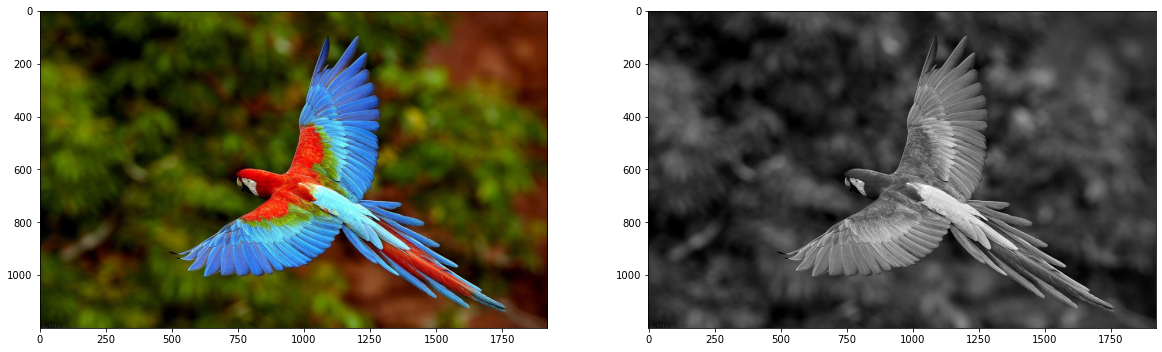

In [4]:
plt.figure(figsize=(20,15))
plt.subplot(1,2,1)
plt.imshow(rgb_img, cmap='gray')

plt.subplot(1,2,2)
plt.imshow(gray_img, cmap='gray')

plt.show()

# Declaring Functions

In [5]:
def Padding (img):
    w,h = img.shape
    new_img = np.zeros(shape=(w+2,h+2))
    new_w,new_h = new_img.shape
    new_img[1:new_w-1, 1:new_h-1] = img
    
    return new_img

In [6]:
def Convulotion(img, kernel): 
    
    img = Padding(np.array(img))
    
    w,h = img.shape
    _,k = kernel.shape
    new_w, new_h = w-k+1, h-k+1
    
    conv_img = np.zeros(shape=(new_w, new_h))
    
    for i in range(new_w):
        for j in range(new_h):
            mat = img[i:i+k, j:j+k]
            conv_img[i, j] = np.sum(np.multiply(kernel, mat))
            
            if conv_img[i,j]<0:
                conv_img[i,j] = 0
            if conv_img[i,j]>255:
                conv_img[i,j] = 255
    
    return conv_img
    
    

In [10]:
laplace_kernel = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
sobel_kernel = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
sobel_kernel.shape

(3, 3)

In [11]:
laplace_conv = Convulotion(gray_img,laplace_kernel)

sobel_conv = Convulotion(gray_img,sobel_kernel)

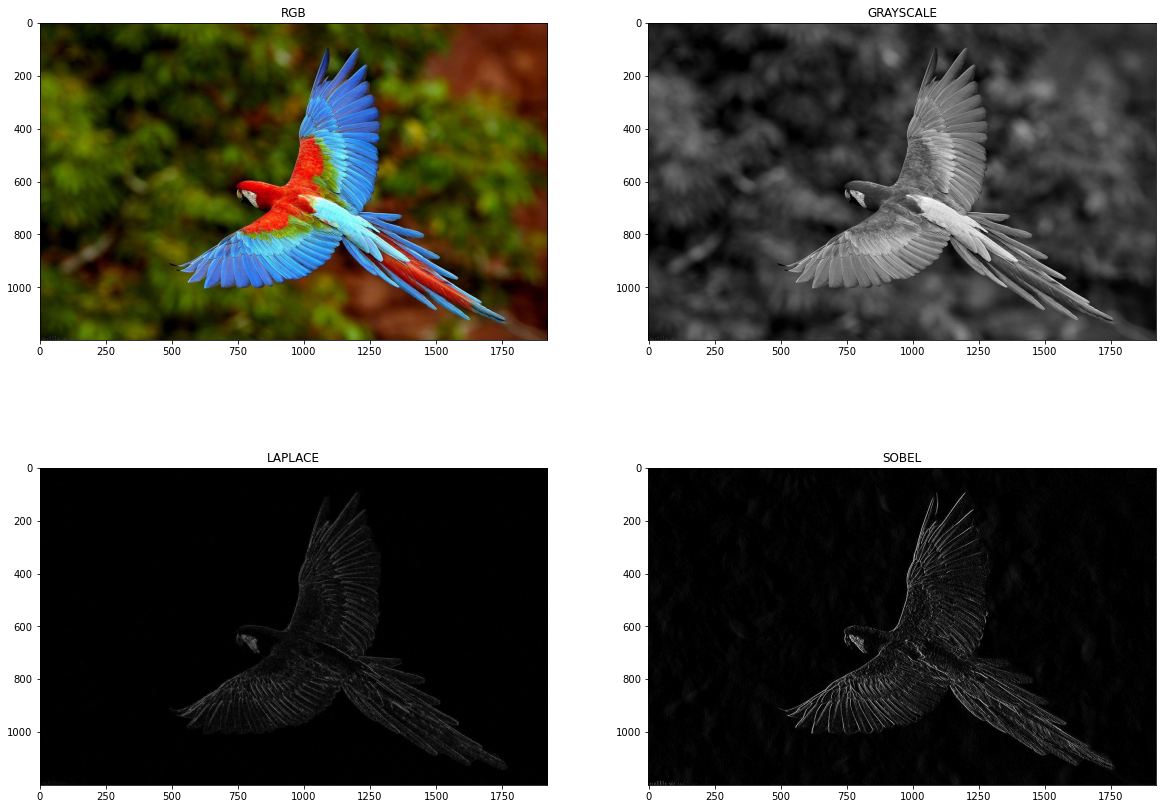

In [12]:
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
plt.title('RGB')
plt.imshow(rgb_img, cmap='gray')

plt.subplot(2,2,2)
plt.title('GRAYSCALE')
plt.imshow(gray_img, cmap='gray')

plt.subplot(2,2,3)
plt.title('LAPLACE')
plt.imshow(laplace_conv, cmap='gray')

plt.subplot(2,2,4)
plt.title('SOBEL')
plt.imshow(sobel_conv, cmap='gray')

plt.show()